In [17]:
using PyPlot
using LaTeXStrings

include("useful_func.jl")
include("logistic_func.jl")

logistic_result (generic function with 2 methods)

# Genrate Data 

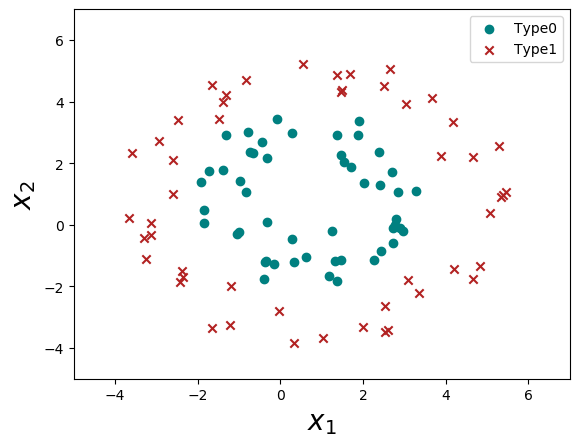

In [2]:
num_sets = 50
distur = 1.5
data = zeros(2*num_sets, 3)

r = 2
θ = range(0, length=num_sets, stop=2*pi)
x1, x2 = r .* sin.(θ) .+ rand(num_sets).*distur, r .* cos.(θ) .+ rand(num_sets).*distur
data[1:num_sets, :] = [x1 x2 ones(num_sets)]
scatter(x1, x2, c="teal", label="Type0")

r = 4
x1, x2 = r .* sin.(θ) .+ rand(num_sets).*distur, r .* cos.(θ) .+ rand(num_sets).*distur
data[num_sets+1:end, :] = [x1 x2 zeros(num_sets)]
scatter(x1, x2, marker="x", c="firebrick", label="Type1")

xlabel(L"x_1", fontsize=20)
ylabel(L"x_2", fontsize=20)
legend(loc="best", fontsize=10)
xlim(-5, 7)
ylim(-5, 7)

savefig("example.svg", optimize=true, format="svg", transparent=true)

# Plot 

In [18]:
function logistic_grad_reg(theta::Vector, x, y, lambda)
    hypo = logistic_hypo(theta, x)
    conv(((hypo .- y)' * x) ./ length(y), 1)      # Vector
end

logistic_grad_reg (generic function with 1 method)

In [19]:
input = data[:, 1:2]
output = data[:, end:end]


input = mapFeature.(input[:, 1], input[:, 2], 3)
input = Array(hcat(input...)')

theta = zeros(size(input, 2))

logistic_grad(theta, input, output)

10-element Array{Float64,1}:
 0.0                 
 0.018043408690759356
 0.018306475910590154
 1.635449371523147   
 0.1674102614671051  
 1.5878568450963764  
 4.413297689791662   
 1.3009772332849123  
 1.7598258354263685  
 3.661038882269458   

In [20]:
input

100×10 Array{Float64,2}:
 1.0   0.280161  2.96946    0.0784899  …   0.233073    2.47037    26.1838    
 1.0   1.36661   2.91288    1.86764        5.44019    11.5955     24.7154    
 1.0   1.91495   3.37957    3.66703       12.393      21.8716     38.5997    
 1.0   1.53286   2.0461     2.34965        4.80762     6.41735     8.56606   
 1.0   1.7011    1.87093    2.89373        5.41397     5.95448     6.54895   
 1.0   1.87981   2.92589    3.53367    …  10.3391     16.0927     25.048     
 1.0   2.37856   2.36638    5.65756       13.3879     13.3194     13.2512    
 1.0   2.69921   1.72328    7.28572       12.5554      8.01585     5.11764   
 1.0   2.02612   1.36724    4.10516        5.61273     3.78751     2.55583   
 1.0   3.29203   1.10962   10.8374        12.0254      4.05332     1.36622   
 1.0   2.84904   1.06878    8.11703    …   8.67535     3.25445     1.22087   
 1.0   2.40964   1.28661    5.80636        7.47054     3.98886     2.12983   
 1.0   2.80282   0.191207   7.85579    